# Baseball Case Study<br><br>
**Problem Statement:**<br><br>
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. <br><br>

**-- Input features:**<br> Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors
<br><br>
**-- Output:**<br> Number of predicted wins (W)<br><br><br>

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Baseball_Case_Study to Baseball_Case_Study (4)


In [3]:
df=pd.read_csv("Baseball_Case_Study")

### Exploratory Data Analysis

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


This shows the first five rows of the dataset

In [5]:
df.shape

(30, 17)

There are 30 rows and 17 columns in the given dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


This describes the information of the the columns of the dataset. It shows the column names, count and datatype.<br><br> We can see that there are no missing values in the dataset.<br><br>

In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values in the dataset.

In [8]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

We can see the datatype of all the columns in the dataset.



In [9]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Shows all the column names

**Changing Column Names**


In [10]:
df.columns=['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'BB', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs', 'Earned Run Average (ERA)', 'CG', 'Shutouts', 'Saves', 'Errors']

In [11]:
# checking the first five rows of the dataset now
df.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,BB,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


We can see the column names changed now.

In [12]:
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,BB,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),CG,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


We can see the statistical description of the data here.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb14ec48d0>,
      dtype=object)

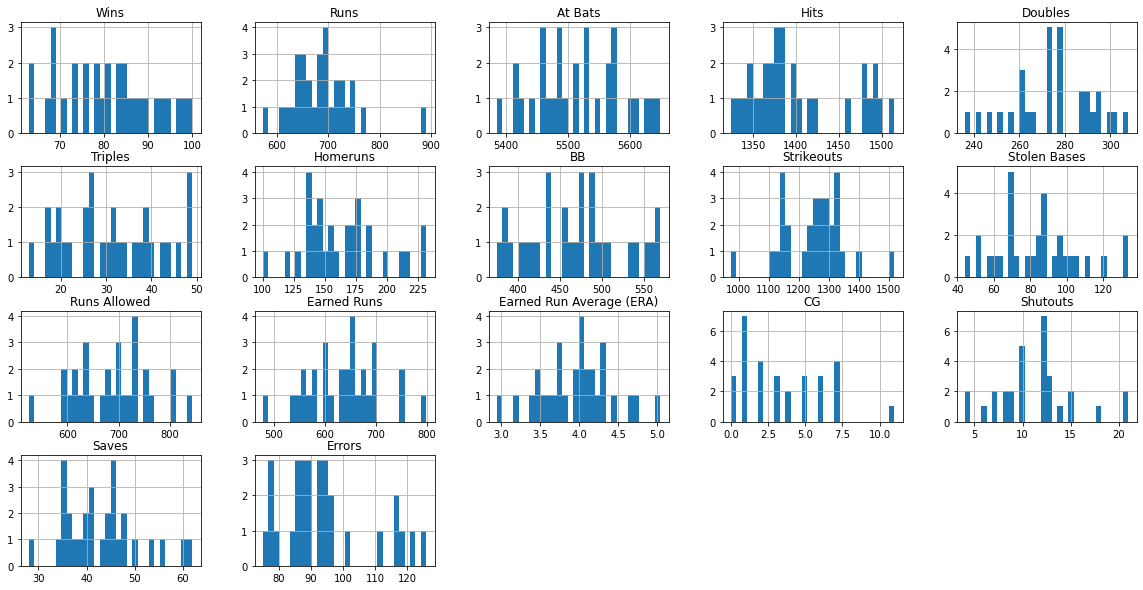

In [13]:
df.hist(figsize=(20,10), grid=True, layout=(4, 5), bins = 30)

**Checking Skewness**

In [14]:
df.skew(axis = 0, skipna = True)

Wins                        0.047089
Runs                        1.200786
At Bats                     0.183437
Hits                        0.670254
Doubles                    -0.230650
Triples                     0.129502
Homeruns                    0.516441
BB                          0.158498
Strikeouts                 -0.156065
Stolen Bases                0.479893
Runs Allowed                0.045734
Earned Runs                 0.058710
Earned Run Average (ERA)    0.053331
CG                          0.736845
Shutouts                    0.565790
Saves                       0.657524
Errors                      0.890132
dtype: float64

For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.<br><br>Runs has highest skewness followed by Errors and CG .

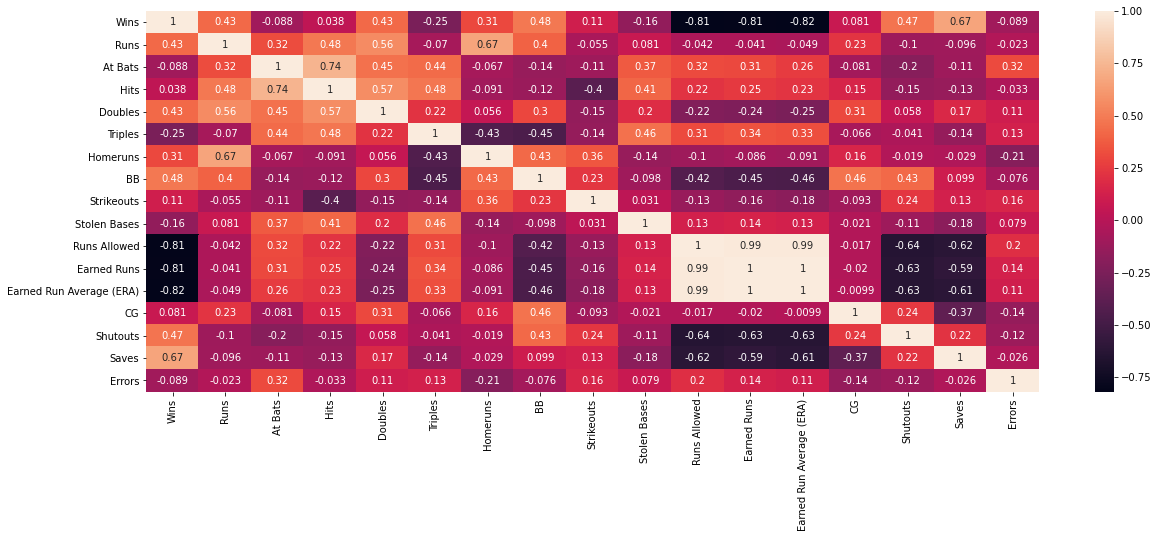

In [15]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

This heatmap shows the correleation between the columns of the dataset

### Outliers handling

In [16]:
df = pd.get_dummies(df)
dummy_data = df.copy()

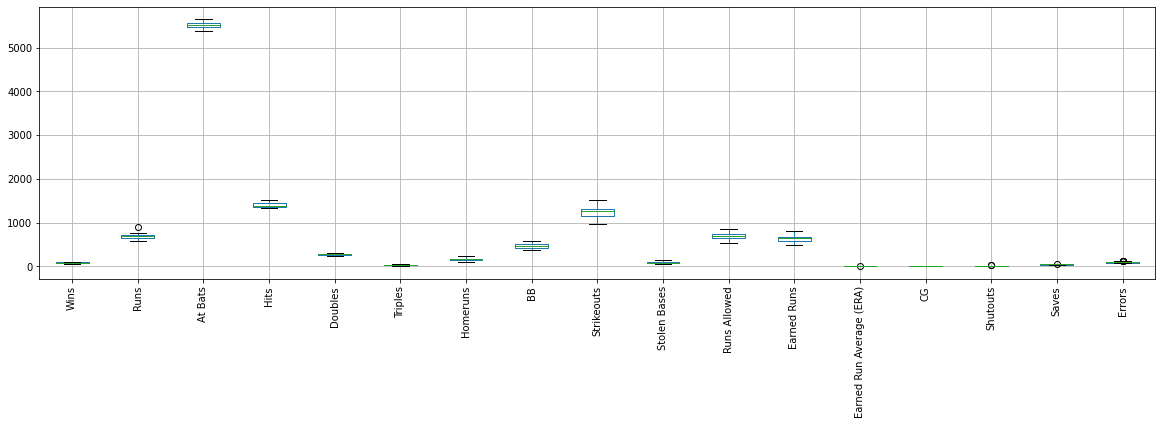

In [17]:
df.boxplot( rot = 90, figsize=(20,5))


Based on the observations from the above boxplot, checking the columns where null values may be present.

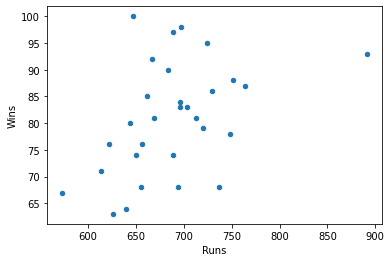

In [18]:
data_plot=pd.concat([dummy_data['Wins'],dummy_data['Runs']],axis=1)
data_plot.plot.scatter(x='Runs',y='Wins')

We can see that there is one Outlier for Wins output and Runs input attributes as per above visualisation plot.

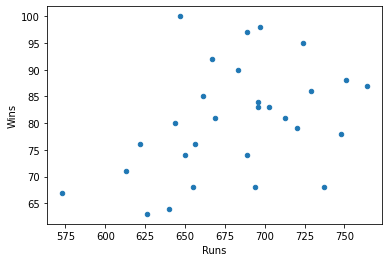

In [19]:
#removing the outlier
df=df.drop(df[(df['Runs']>850) & (df['Runs']<900)].index)
data_plot=pd.concat([df['Runs'],df['Wins']],axis=1)
data_plot.plot.scatter(x='Runs',y='Wins')

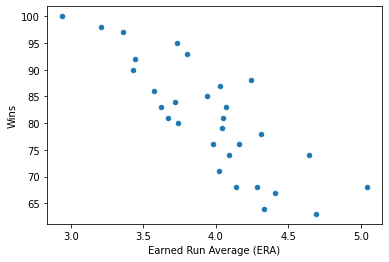

In [20]:
data_plot=pd.concat([dummy_data['Wins'],dummy_data['Earned Run Average (ERA)']],axis=1)
data_plot.plot.scatter(x='Earned Run Average (ERA)',y='Wins')

We can see that there are no Outliers for Wins output and Earned Run Average (ERA) input attributes as per above visualisation plot.

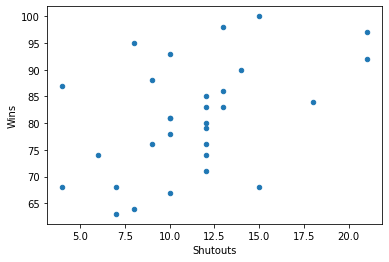

In [21]:
data_plot=pd.concat([dummy_data['Wins'],dummy_data['Shutouts']],axis=1)
data_plot.plot.scatter(x='Shutouts',y='Wins')

We can see that there are no Outliers for Wins output and Shutouts input attributes as per above visualisation plot.

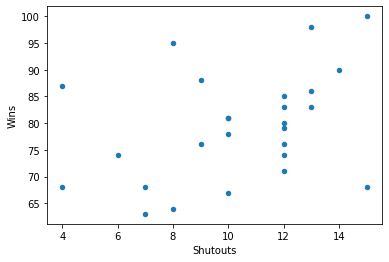

In [22]:
#removing the outlier
df=df.drop(df[(df['Shutouts']>17.5) & (df['Shutouts']<22.5)].index)
data_plot=pd.concat([df['Shutouts'],df['Wins']],axis=1)
data_plot.plot.scatter(x='Shutouts',y='Wins')

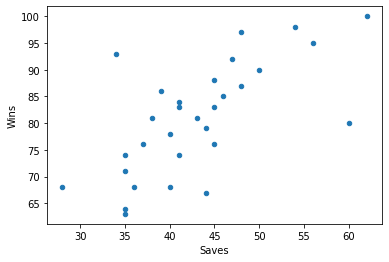

In [23]:
data_plot=pd.concat([dummy_data['Wins'],dummy_data['Saves']],axis=1)
data_plot.plot.scatter(x='Saves',y='Wins')

There are no considerate outliers here.

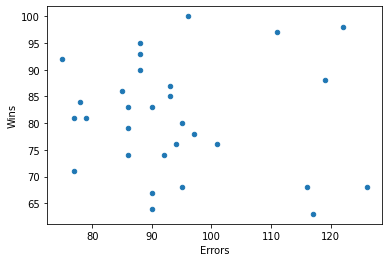

In [24]:
data_plot=pd.concat([dummy_data['Wins'],dummy_data['Errors']],axis=1)
data_plot.plot.scatter(x='Errors',y='Wins')

We can see that there are few outliers between 110 and 130

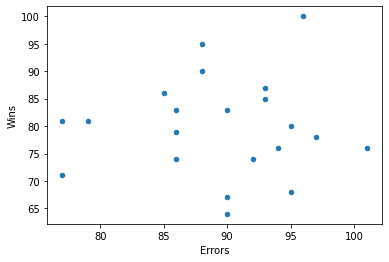

In [25]:
#removing the outliers
df=df.drop(df[(df['Errors']>110) & (df['Errors']<130)].index)
data_plot=pd.concat([df['Errors'],df['Wins']],axis=1)
data_plot.plot.scatter(x='Errors',y='Wins')

In [26]:
# Creating bins for the win column
def assign_win_bins(Wins):
    if Wins < 50:
        return 1
    if Wins >= 50 and Wins <= 69:
        return 2
    if Wins >= 70 and Wins <= 89:
        return 3
    if Wins >= 90 and Wins <= 109:
        return 4
    if Wins >= 110:
        return 5
    
df['win_bins'] = df['Wins'].apply(assign_win_bins)

In [27]:
# Create new features for Runs per Game and Runs Allowed per Game
df['R_per_game'] = df['Runs'] / df['CG']
df['RA_per_game'] = df['Runs Allowed'] / df['CG']

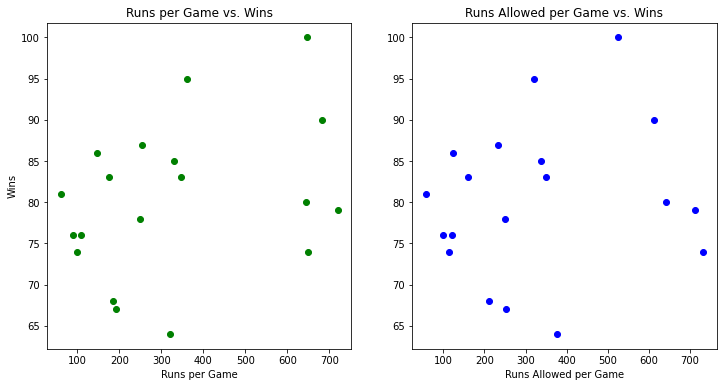

In [28]:
# Create scatter plots for runs per game vs. wins and runs allowed per game vs. wins
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['R_per_game'], df['Wins'], c='green')
ax1.set_title('Runs per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(df['RA_per_game'], df['Wins'], c='blue')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

##### Encoding

In [30]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
for column in df.columns:
    df['Wins'] = labelencoder.fit_transform(df["Wins"])

In [31]:
df['Wins'].value_counts()

4     2
10    2
9     2
5     2
16    1
6     1
1     1
2     1
3     1
8     1
7     1
15    1
11    1
12    1
13    1
14    1
0     1
Name: Wins, dtype: int64

In [32]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
df['Wins'] = labelencoder.fit_transform(df["Wins"])

### Preprocessing, Modeling, Evaluation

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV

There is no need to apply cleaning to our dataset. Because we dont have any error or empty or null values.

In [34]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = labelencoder.fit_transform(df[column])

**-----> Checking Accuracies** 

In [38]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32']

newdf = df.select_dtypes(include=numerics)

In [39]:
# Split data DataFrame into train and test sets
train = newdf.sample(frac=0.75, random_state=1)
test = newdf.loc[~newdf.index.isin(train.index)]

x_train = train[newdf.columns]
y_train = train['Wins']
x_test = test[newdf.columns]
y_test = test['Wins']

In [40]:
model_log = LogisticRegression(solver='liblinear')
model_log.fit(x_train, y_train)
prediction_log = model_log.predict(x_test)


model_tree = DecisionTreeClassifier() 
model_tree.fit(x_train, y_train)
prediction_tree = model_tree.predict(x_test)

model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
prediction_knn = model_knn.predict(x_test)

model_svm_l = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model_svm_l.fit(x_train, y_train)
prediction_svm_l = model_svm_l.predict(x_test)

model_random = RandomForestClassifier(n_estimators=300)
model_random.fit(x_train, y_train)
predict_random = model_random.predict(x_test)

model_gaus = GaussianNB()
model_gaus.fit(x_train, y_train)
prediction_gaus = model_gaus.predict(x_test)

In [41]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_log, y_test))
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction_tree, y_test))
print('The accuracy of the  K-Nearest Neighbours is ', metrics.accuracy_score(prediction_knn, y_test))
print('The accuracy of the Linear Support Vector Machine is ', metrics.accuracy_score(prediction_svm_l, y_test))
print('The accuracy of the  Random Forest is ', metrics.accuracy_score(predict_random, y_test))
print('The accuracy of the  Gaussian Naive Bayes is ', metrics.accuracy_score(prediction_gaus, y_test))

The accuracy of the Logistic Regression is 0.0
The accuracy of the Decision Tree is  0.0
The accuracy of the  K-Nearest Neighbours is  0.0
The accuracy of the Linear Support Vector Machine is  0.0
The accuracy of the  Random Forest is  0.0
The accuracy of the  Gaussian Naive Bayes is  0.0


We are unable to predict with accuracy as all the models are showing zero accuracy.

<br><br>**Checking Mean Absolute Error of the Models.**<br><br>This tells us that the average difference between the actual data value and the value predicted by the model.
* The lower the MAE for a given model, the more closely the model is able to predict the actual values.



--->Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

mae = mean_absolute_error(y_test, predictions)

print(mae)

1.459627387798414


--->Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import mean_absolute_error

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

mae = mean_absolute_error(y_test, predictions)

print(mae)

2.0


--->KNN Model

In [48]:
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import mean_absolute_error

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

mae = mean_absolute_error(y_test, predictions)

print(mae)

4.0


--->SVM Model

In [50]:
from sklearn import svm

from sklearn.metrics import mean_absolute_error

model_svm_l = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model_svm_l.fit(x_train, y_train)
predictions = model_svm_l.predict(x_test)

mae = mean_absolute_error(y_test, predictions)

print(mae)

3.8


---> Naive Bayes Model

In [51]:
from sklearn.naive_bayes import GaussianNB 

from sklearn.metrics import mean_absolute_error

nb = GaussianNB()
nb.fit(x_train, y_train)
predictions = nb.predict(x_test)

mae = mean_absolute_error(y_test, predictions)

print(mae)

2.8


--->Decision Tree Model

In [52]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_absolute_error

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predictions = dt.predict(x_test)

mae = mean_absolute_error(y_test, predictions)

print(mae)

4.8


We can see that the Mean Absolute Error is less for Linear Regresssion Model followed by Random Forest Classifier Model.

**Hyper Parameter tuning**

In [58]:
X=newdf.drop(['Wins'], axis=1)
y=newdf['Wins']

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=30,
                           n_features=17,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=30, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 200}


In [68]:
hyper = {'n_estimators': n_estimator}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6333333333333333
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.2s finished


In [84]:
from sklearn.metrics import r2_score, mean_squared_error
best_reg = gd.best_estimator_
y_pred = best_reg.predict(x_train)
final_mae = mean_absolute_error(y_train, y_pred)

final_mae

7.0

**Saving the Model**

In [85]:
import joblib


In [86]:
joblib.dump(rfc, 'baseball_case_study.pkl')


['baseball_case_study.pkl']

In [87]:
# Load the model from the file
rfc_from_joblib = joblib.load('baseball_case_study.pkl')

In [96]:
rfc_from_joblib

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)